
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, I will analysing data from the 100k medical appointments in Brazil which was gotten from Kaggle and in this analysis i will concentrate on finding insights among patients who showed up for a scheduled appointment and how these patients are distinct from those that did not show up for their scheduled appointment.This dataset will also give insights unto why patients do not show up for appointments. Each row represent a patient and they include the following features:
<ul>
    <li> PatientId: this is the unique identification of each patient</li>
<li> AppointmentID: This identifies each appointment</li>
<li> Gender: This gives information about the gender of the patient</li>
<li> ScheduledDay: the date the patient set up the appointment</li>
<li> AppointmentDay: the date of the appointment</li>
<li> Age: The age of the patient</li>
<li> Neighbourhood: The name of the location of the hospital.</li>
<li> Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.This column says 0 represents False and 1 represents True</li>
<li> Hipertension: this specifies if a patient is has hypertension.This column says 0 represents False and 1 represents True</li>
<li> Diabetes: this specifies if a patient is has diabetes.This column says 0 represents False and 1 represents True</li>
<li> Alcoholism: This shows whether or not a patient has alcoholism. This column says 0 represents False and 1 represents True</li>
<li> Handcap:  This shows whether or not a patient has a disability. This column says 0 represents False and 1 represents True</li>
<li> SMS_received: this indicates wheather any messages were sent to the patient. This column says 0 represents False and 1 represents True</li>
<li> No-show: this shows if a patient shows up to an appointment, its says "No" if the patient showed up and "Yes" if they did not show up.</li>
</ul>
These features would be helpful to determine why some patients show up for appointments and others do not



### Question(s) for Analysis
Some of the questions that will be explored in this analysis are:
<ul>
    <li> What locations had the hoghest number of patients that showed up? </li>
    <li>Features of Patients that showed up to appointments?</li>
    <li>What day of the week did most patients show up?</li>
    <ul>
        Many other questions would also be explored.




In [1]:
#import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section,The dataset will be loaded as a dataframe into the notebook. The name of the the dataframe will be called no_show_df.
 The dataframe no_show_df would be assessed for cleanliness, and the various methods would be performed on no_show_df to ensure the dataset is cleaned and ready for analysis.



To load our dataset, the pandas library has a function know as read_csv, this function would be used to load the dataset as the dataframe that would be known as no_show_df.

In [2]:
no_show_df = pd.read_csv("noshowappointments-kagglev2-may-2016 (1).csv")


In [3]:
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


To get the number of rows and colums that the dataset contains the shape attribute will be used 

In [4]:
no_show_df.shape

(110527, 14)

The dataset contains 110527 rows and 14 columns.

To inspect the dataset to know the the datatypes contained in each column and also know if they contain the correct datatype, the pandas funtion info is used.

In [5]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the informaton gotten above, only  ScheduledDay and AppointmentDay columns have the the wrong datatype because both columns are meant to have values of datetime objects but their values are strings.
From the output from above, it can be seen that all the columns have complete entries.
To be certain, we can use use the isnull pandas function to check.

In [6]:
no_show_df.isnull().all()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

From the output given above, it is very clear that all columns in this dataset does  not have any null value.


Next, checking for duplicates, this is carried out by using the duplicated function

In [7]:
no_show_df.duplicated().any()

False

There are no duplicates in the dataset.


Final assessment that would be done on the dataset is to get descriptive statistics information about the entire dataset. The function that would achieve this, is the describe function.

In [8]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the information given above, it is can be seen the mean age is 37.088874, the maximum value of age is 115 which is too high for a person but there is a negative value as the minimum age which can not be right because a person can not have a negative value as age. Also the maximum vale in the handcap column which also is an error, because the only values meant to be in that column are "0" and "1". The rest of the dataset seems to be okay


### Data Cleaning
After accessing and inspecting the dataset gotten from kaggle, there is need to clean the data this will make the analysis more accurate. some of the problems that i am going to solve with data cleaning are incorrect data type, wrong values and also make column headers uniform in format and correct spelling.
I will also be adding a column 'day_of_appointment' to the dataframe.

First the spelling of "hipertension" column is wrong, so that will be corrected using the rename function to give the right spelling. 
 

In [9]:
no_show_df.rename(columns = {"Hipertension":"Hypertension"}, inplace= True)
no_show_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

To make the column names more readable, its best to separate columns names with two words with an underscore because the joining the two words together like the way its done in the dataset can be a bit confusing to read. the column names with these problem are PatientId', 'AppointmentID', ScheduledDay' and 'AppointmentDay'. The rename method would be used to seeparate the columns with an underscore.

In [10]:
no_show_df.rename(columns={"PatientId":"Patient_Id", "AppointmentID":"Appointment_ID", "ScheduledDay":"Scheduled_Day", "AppointmentDay":"Appointment_Day"}, inplace=True)
no_show_df.columns

Index(['Patient_Id', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

Also, i think changing the hypen in the "No-show" column name would be best to replace it an underscore. Also like all the column names to be in lowercase. all these will be achieved with the rename function

In [11]:
no_show_df.rename(columns=lambda x: x.lower().replace("-","_"), inplace=True)
no_show_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

Another issue found in the age column is the presence of a negative value since age can not be negative and the source of the error is not known. whats best for the analysis is dropping the row that has the negative value of age.

In [12]:
no_show_df.drop(no_show_df[no_show_df["age"] <= -1].index, inplace=True)
no_show_df.age.min()

0

After checking if the negatives values have been dropped, another problem is that there are patients with zero (0) as their age. These patients need to be dropped from the dataset.

In [13]:
no_show_df.drop(no_show_df[no_show_df["age"] == 0].index, inplace=True)
no_show_df.age.min()

1

The maximum value in the age was 115 which is also very high for a human. i do not know for certain that this was not an error, i am also dropping the row too.

In [14]:
no_show_df.drop(no_show_df[no_show_df["age"] == 115].index, inplace=True)
no_show_df.age.max()

102

after dropping the column with the maximum age of 115, the next maximum age is 102, which is also very high. So that row would be dropped.

In [15]:
no_show_df.drop(no_show_df[no_show_df["age"] == no_show_df.age.max()].index, inplace=True)
no_show_df.age.max()

100

The max age is 100, which is reasonable.

From exploring the dataset, 'scheduled_day' and 'appointment_day' appears to be in the wrong datatype. So will have to convert it from a string object to a datetime object, using the pandas to_datetime method.

In [16]:
no_show_df["appointment_day"] = pd.to_datetime(no_show_df["appointment_day"])
no_show_df["scheduled_day"] =pd.to_datetime(no_show_df["scheduled_day"])
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106980 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       106980 non-null  float64            
 1   appointment_id   106980 non-null  int64              
 2   gender           106980 non-null  object             
 3   scheduled_day    106980 non-null  datetime64[ns, UTC]
 4   appointment_day  106980 non-null  datetime64[ns, UTC]
 5   age              106980 non-null  int64              
 6   neighbourhood    106980 non-null  object             
 7   scholarship      106980 non-null  int64              
 8   hypertension     106980 non-null  int64              
 9   diabetes         106980 non-null  int64              
 10  alcoholism       106980 non-null  int64              
 11  handcap          106980 non-null  int64              
 12  sms_received     106980 non-null  int64              
 13 

Since the question "what day of the week did most patients show up?" a column that represents the day of the week of appointment day will created and will be called "day_of_appointment". The dt.day_name method that returns the day names of the Series or DatetimeIndex with specified locale. This method would be used to get the day of the week for each datatime64 value in the appointment_day column.

In [17]:
no_show_df["day_of_appointment"] = no_show_df["appointment_day"].dt.day_name()
no_show_df["day_of_appointment"]

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
110522    Tuesday
110523    Tuesday
110524    Tuesday
110525    Tuesday
110526    Tuesday
Name: day_of_appointment, Length: 106980, dtype: object

In [18]:
no_show_df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show', 'day_of_appointment'],
      dtype='object')

From using the pandas columns attribute it can be seen that the column 'day_of_appointment' has been added to the data frame and there a total of 15 columns in the dataframe.

We will also have to drop the row where the handcap column has a value of 4 and greater than 1

In [19]:
no_show_df.drop(no_show_df[no_show_df["handcap"] > 1].index, inplace=True)
no_show_df["handcap"].max()

1

In [20]:
no_show_df.shape

(106781, 15)

After cleaning the data, The dataset contains 106781 rows and 15 columns.

<a id='eda'></a>
## Exploratory Data Analysis
 Now that the data has been trimmed and cleaned, the next step is Exploratory Data Analysis. 

### Research Question 1: WHAT IS THE NUMBER OF MALE AND FEMALE PATIENTS?

In [21]:
no_show_df.gender.value_counts()

F    70002
M    36779
Name: gender, dtype: int64

Using value_counts on the gender column, it can be seen that there more females than males in the dataset. The number of female patients is 70,111 and that of male patients is 36,869 

### Research Question 2 :DID PATIENTS WITH SCHOLARSHIPS SHOW UP MORE FOR APPOINTMENTS?

To differentiate between rows of of patients who showed up and those that did not, assigned variabes which are showed_up and did_not_show.

In [22]:
showed_up = no_show_df.no_show == "No"
did_not_show =  no_show_df.no_show == "Yes"

In [23]:
no_show_df.groupby("scholarship", as_index=False)["no_show"].value_counts()

,scholarship,no_show,count
0,0,No,76924
1,0,Yes,19066
2,1,No,8221
3,1,Yes,2570


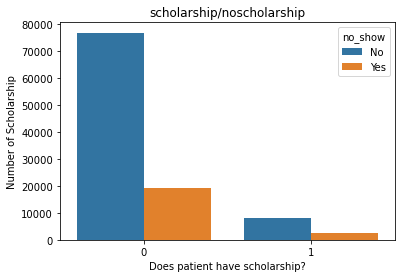

In [24]:
sns.countplot(x= no_show_df.scholarship, hue=no_show_df.no_show)
plt.title("scholarship/noscholarship")
plt.xlabel("Does patient have scholarship?")
plt.ylabel("Number of Scholarship")
figsize=(10,10)

From using the groupby and value_counts methods, it can be seen that patients with sholarships did not show up more for appointments. As "No" in the table above represents those that showed up and "Yes" for those that did not show. it can be seen that more people without scholarship showed up more, this could be because there are more people without scholarship. The mean could be use to find answer to this question and also use proportions and percentages to be certain. 
First, start with the mean.



In [25]:
no_show_df.scholarship[showed_up].mean()

0.09655293910388162

In [26]:
no_show_df.scholarship[did_not_show].mean()

0.11878350896653725

From using the mean of scholarship values of the patients that showed and those that did not show. it can be seen that patients that had scholarships likely did not show up for their appointments.


To calculate the percentage of patients that had no scholarship and showed up to the the all the patients that had no scolarships. the loc and query mthods would be use. First, a function will be created to  counts the rows of that returns the rows specified in the loc method and the query method.
"no_schol_show" represents the patients that did not have scholarship but showed up.
"total_no_show" total number of patients that did not have scholarship. 


In [27]:
def counts_rows(loc_condition, query_request):
    '''counts the rows of that returns the rows specified by the loc_condition in the loc method and the query_request in the query method.'''
    counts = no_show_df.loc[loc_condition].query(query_request).value_counts().sum()
    return counts
    

In [28]:
no_schol_show = counts_rows(showed_up, "scholarship == 0")
total_no_schol = no_show_df.query("scholarship == 0").count()[1]
(no_schol_show/total_no_schol)*100

80.13751432440878

In [29]:
schol_show = counts_rows(showed_up, "scholarship == 1")
total_schol = no_show_df.query("scholarship == 1").count()[1]
(schol_show/total_schol)*100

76.18385691780188

The percentage of patients that had scholarship and showed up to the number of patients that had scholarship is 76.18% which is less than those than those that did not have scholarship and showed up, which has a percentage of 80.14%. This means that more patients with out scholarship showed up more.


### Research Question 3 : WHAT LOCATION HAS THE HIGHEST PATIENTS THAT SHOWED UP TO APPOINTMENTS AND WHAT LOCATION HAD THE LEAST?

In [30]:
no_show_df.neighbourhood.nunique()

81

nunique is a pandas method that returns the number of unique valuse in a column. this means there are 81 neighbourhoods where hospitals are located.

In [31]:
no_show_df.loc[showed_up]["neighbourhood"].value_counts()

JARDIM CAMBURI       6154
MARIA ORTIZ          4368
RESISTÊNCIA          3352
JARDIM DA PENHA      3219
CENTRO               2588
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighbourhood, Length: 80, dtype: int64

In [32]:
# because the length is the output above is 80 which means one neighbourhood did not have any patients that showed up
for value in no_show_df.neighbourhood.unique():
    if value not in  no_show_df.loc[showed_up]["neighbourhood"].unique(): 
         print(value)
   

ILHAS OCEÂNICAS DE TRINDADE


Out of 81 hospitals locations, it can be seen that the hospital in JARDIM CAMBURI has the highest number of patients that showed up to appointments and  the hospital at 'ILHAS OCEÂNICAS DE TRINDADE' did not have any patients that showed up. 

### Research Question 4 : WHAT LOCATION HAD THE HIGHEST NUMBER OF PATIENTS THAT DID NOT SHOW UP AND WHAT LOCATION HAD THE LEAST?

In [33]:
no_show_df.loc[did_not_show]["neighbourhood"].value_counts()

JARDIM CAMBURI                 1432
MARIA ORTIZ                    1194
ITARARÉ                         896
RESISTÊNCIA                     872
CENTRO                          690
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighbourhood, Length: 80, dtype: int64

In [34]:
# because the length is the output above is 80 which means one neighbourhood did not have any patients that  did not show up
for value in no_show_df.neighbourhood.unique():
    if value not in  no_show_df.loc[did_not_show]["neighbourhood"].unique(): 
         print(value)
   

PARQUE INDUSTRIAL


Out of 81 hospitals locations, it can be seen that the hospital in JARDIM CAMBURI has the highest number of patients that DID NOT showed up to appointments and  the hospital at PARQUE INDUSTRIAL had the least number of patients that DID NOT showed up for appointments.

### Research Question 5 : HOW MANY PATIENTS RECEIVED SMS_MESSAGES BEFORE THEIR APPOINTMENTS?
The query method is used to get the rows that resecived sms which is represented with 1 in their column. the value_count method counts the number of rows and sum() adds them alltogether. 


In [35]:
no_show_df.query("sms_received == 1").value_counts().sum()

34537

Only 34,537 of patients received sms before their appointments. This means that patients who did not receive sms are more than those that received because the dataset contains over 100,000 patients and only 34,537 patients received.

### Research Question 6 :  FROM PATIENTS THAT RECEIVED SMS, HOW MANY OF THE PATIENTS SHOWED UP AND HOW MANY DID NOT? 


First, a function will be created to  counts the rows of that returns the rows specified in the loc method and the query method.

In [36]:
def counts_rows(loc_condition, query_request):
    '''counts the rows of that returns the rows specified by the loc_condition in the loc method and the query_request in the query method.'''
    counts = no_show_df.loc[loc_condition].query(query_request).value_counts().sum()
    return counts
    

In [37]:
# get the counts of patients that received sms and showed up, the counts_rows function would be used.
sms_query = "sms_received == 1" # this variable represents a statement to query the rows that received sms.
received_show = counts_rows(loc_condition=showed_up, query_request=sms_query)

received_show

24978

In [38]:
# get the counts of patients that received sms and did not show up
received_no_show = counts_rows(did_not_show, sms_query)
received_no_show

9559

Lets visualize the data in a barplot.

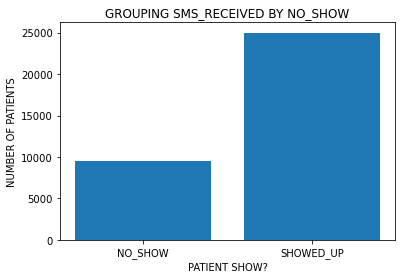

In [39]:
locations = [1, 2]
heights = [received_no_show, received_show]
labels = ['NO_SHOW', 'SHOWED_UP']
plt.bar(locations, heights, tick_label=labels)
plt.title('GROUPING SMS_RECEIVED BY NO_SHOW')
plt.xlabel('PATIENT SHOW?')
plt.ylabel('NUMBER OF PATIENTS')
figsize=(8,6);

This shows most patients that received sms messages before their appointments showed up to the hospital.

###  Research Question 7: DID MOST OF THE PATIENTS WHO ARE HANICAPPED OR DISABLED SHOW UP FOR THEIR APPOINTMENTS?

First we find the number of patients who are handicapped or disabled in the dataset

In [40]:
no_show_df.query("handcap == 1").value_counts().sum()

2037

2037 patients are disabled

In [41]:
# to get the number of patients that is disabled and showed up the counts_rows function can be used.
is_disabled = "handcap == 1"
handcap_show = counts_rows(showed_up, is_disabled)
handcap_show

1674

handcap_show represents patients that are handicapped and also showed up. The handcap_show gave an output of 1674 which means that out of 2,037 patients that are disabled, 1,674 of them showed up. This shows most of the patients that are handicapped showed up for thir appointments.

### Research Question 8: HOW MANY PATIENTS HAVE DIABETES AND HOW MANY DID NOT SHOW UP FOR APPOINTMENTS?

In [42]:
no_show_df.query("diabetes == 1").value_counts().sum()

7900

7900 patients have diabetes. The functions that was used are the query, value_counts and the sum which add all the columns together. to get the number of patients thet did not show up the "did_not_show" variable is passed into the loc function and is added to the function above.

In [43]:
# to get the number of patients that suffer from diabetes and did not show up the counts_rows function can be used.
has_diabetes = "diabetes == 1"
counts_rows(did_not_show, has_diabetes)


1422

1422 patients that had diabetes did not show up.

### Research Question 9:HOW MANY PATIENTS HAVE ALCOHOLISM AND DID MOST SHOW UP FOR APPOINTMENTS?
To answer this question, same methods use in question 6 and 7 will be used

In [44]:
no_show_df.query("alcoholism == 1").value_counts().sum()

3352

3352 patients suffer from alcoholism.

In [45]:
# to get the number of patients that suffer from alcoholism and showed up the counts_rows function can be used.
has_alcoholism = "alcoholism == 1"
counts_rows(showed_up, has_alcoholism)

2677

Most of the patients that suffer from alcoholism, showed up to their appointments.

### Research Question 10: WHAT ARE THE PERCENTAGES OF PATIENTS THAT SHOWED UP AND THOSE THAT DID NOT?
A pie chart would be a good way to viualize this. 

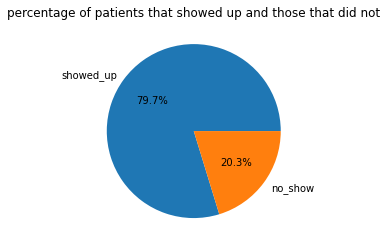

In [46]:
plt.pie(no_show_df.no_show.value_counts(), labels=["showed_up", "no_show"], autopct="%1.1f%%")
plt.title("percentage of patients that showed up and those that did not")
figsize=(15,15);

79.7% of patients showed up for appointments and 20.3% of patients did not show up for appointments

### Research Question 10:  DO OLDER PEOPLE SHOW UP MORE FOR APPOINTMENTS?

We have to find the median age first using pandas median function, young patients would represent patients who age are less than than the median age. older patients are patients whose age are equal or greater than the median age.

In [47]:
median = no_show_df.age.median()
young = no_show_df.query('age < {}'.format(median))
older = no_show_df.query('age >= {}'.format(median))

Next, we find the value count of the no_show column for both young and older groups. The no_show column has two options "No" and "Yes". "No" represents showed up and "Yes" represents did not show up.

In [48]:
# YOUNG PATIENTS
young.no_show.value_counts()

No     40383
Yes    12109
Name: no_show, dtype: int64

In [49]:
# OLDER PATIENTS
older.no_show.value_counts()


No     44762
Yes     9527
Name: no_show, dtype: int64

We are going to visualize the each of the outputs by plotting a grouped bar chart. To that I will need to create a dictionary of these outputs which i will convert into a dataframe.

In [50]:
data_dict = {"Age_Category": ["Young","older"], "No":[40383, 44762], "Yes":[12109, 9527]}
# convert to dataframe
age_df = pd.DataFrame(data_dict)
age_df

,Age_Category,No,Yes
0,Young,40383,12109
1,older,44762,9527


Next a grouped bar chart will be plotted with the matplotlib.

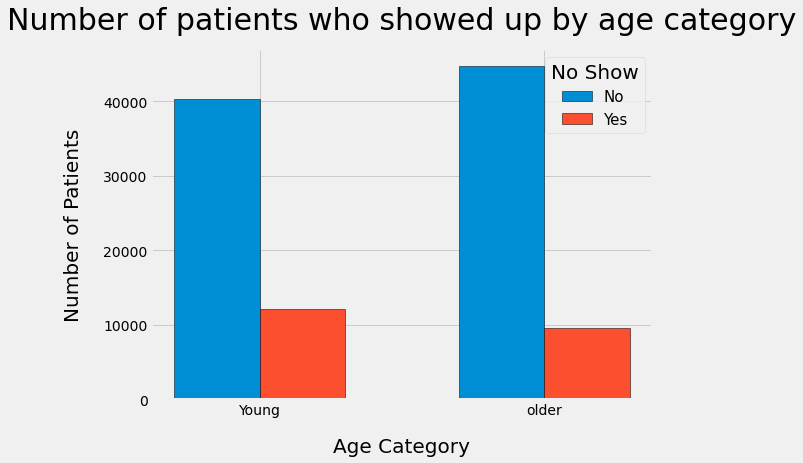

In [51]:
plt.style.use("fivethirtyeight")
#create the base axis to add the bars to
fig, ax = plt.subplots(1, 1, figsize=(8,6))
#get labels
label = age_df["Age_Category"]
# create x ticks to add the data to
x = np.arange(len(label))
# set width
width = 0.3
# create first bar
bar_1 = ax.bar(x - width/2, age_df["No"], width=width, label="No", edgecolor="black")
# create second bar
bar_2 = ax.bar(x + width/2, age_df["Yes"], width=width, label="Yes", edgecolor="black")
# add label to the axis
ax.set_ylabel("Number of Patients", fontsize=20, labelpad=20)
ax.set_xlabel("Age Category", fontsize=20, labelpad=20)
ax.set_title("Number of patients who showed up by age category", fontsize=30, pad=20)

#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)

#legend
ax.legend(title="No Show", fontsize=15, title_fontsize= 20)
plt.show()

From the visualizations, it can be seen that older patients show up more to appointments than young patients and number of young patients that do not show up for appointments is more than that of older patients.




### Research Question 11: WHAT DAY OF THE WEEK DID MOST PATIENTS SHOW UP? AND IS THE DAY  ON A WEEKDAY OR A WEEKEND?

To answer this question the pandas loc and value_counts methods will be use.

In [52]:
no_show_df.loc[showed_up]["day_of_appointment"].value_counts() 

Wednesday    20108
Tuesday      19766
Monday       17360
Friday       14494
Thursday     13387
Saturday        30
Name: day_of_appointment, dtype: int64

From the output above 20108 patients showed on wednesdays which is the highest number of patients that showed up for appointments than anyday of the week.
Most of the patients showed up on a Wednesday which is weekday.

### Research Question 12: WHAT DAY OF THE WEEK HAD THE HIGHEST NUMBER OF PATIENTS THAT DID NOT SHOW UP?

In [53]:
no_show_df.loc[did_not_show]["day_of_appointment"].value_counts() 

Tuesday      5008
Wednesday    4939
Monday       4505
Friday       3936
Thursday     3239
Saturday        9
Name: day_of_appointment, dtype: int64

Tuesday had the highest number of patients that did not show up for appointments.

### Research Question 13: WHAT ARE THE FEATURES OF PATIENTS THAT DID NOT SHOW UP TO APPOINTMENTS AND PATIENTS THAT SHOWED UP FOR APPOINTMENTS?
The describe function will be used on the data frame containing rows of where the no_show column is "Yes" this was saved with the variable "did_not_show" 

In [54]:
no_show_df.loc[did_not_show].describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,2.163600e+04,2.163600e+04,21636.000000,21636.000000,21636.000000,21636.000000,21636.000000,21636.000000,21636.000000
mean,1.468223e+14,5.652583e+06,35.280320,0.118784,0.173230,0.065724,0.031198,0.016778,0.441810
std,2.549772e+14,7.432842e+04,21.419976,0.323541,0.378455,0.247804,0.173857,0.128440,0.496614
min,5.628261e+06,5.122866e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.188006e+12,5.614257e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.159506e+13,5.658434e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.455836e+13,5.703487e+06,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.996585e+14,5.789979e+06,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function will be used on the data frame containing rows of where the no_show column is "No" this was saved with the variable "showed_up"

In [55]:
show = no_show_df.loc[showed_up].describe()
show

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,8.514500e+04,8.514500e+04,85145.000000,85145.000000,85145.000000,85145.000000,85145.000000,85145.000000,85145.000000
mean,1.474281e+14,5.681231e+06,39.060438,0.096553,0.211017,0.076082,0.031440,0.019661,0.293358
std,2.560853e+14,6.936851e+04,22.635787,0.295350,0.408032,0.265131,0.174506,0.138832,0.455304
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.169965e+12,5.646449e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175832e+13,5.685849e+06,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.423372e+13,5.731147e+06,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From using decribe function to answer the question, the mean age of patients who showed up for apppointments is 39.06 and the maximum age is 100 years and the mean of patients who did not show up is 35.28 and the maximum age is 98. Most of the patients that showed up are more likely to have diabetes and hypertension which can be seen from their mean in the show variable. Most of the patients that showed up are likely did not have scholarships. Patients that did not show up likely received a sms message.
    From looking at the outputs above 25th percentile and the 75th percentile of age of of patients who showed up for apppointments is 20 and 57 respectively (this means 25% of the values in age column is below 20 and also 25% of the age values lie above 57) is a bit older than the 25th percentile and 75th percentile of the patients that did not show up which is 18 and 52. 
   Also most of the patients in the dataset showed up.

<a id='conclusions'></a>
## Conclusions

From the Exploratory Data Analysis, these are the conclusions.
<ul>
<li> Patients with scholarships show up more to appointments than those without scholarships.</li>
<li> Most of the Patients with diabetes show up for appointments.</li>
<li> Most patients that recived sms before the their appointments showed up to their appointments</li>
<li>Older patients show up more to their appointments than younger patients.</li>
<li> The hospital neighbourhood that most patients showed up for their appointments is JARDIM CAMBURI</li>
    <li>Most patients show up when the day of the week of their appointment is on Wednesday</li>
    </ul>


## LIMITATION
 The limitation in my exploration, Based on the gender column, we can see that there are more females than males in the dataset which there is a disproportion in the dataset in therms of gender.


## REFERENCES

<ul>
    <li><a href="https://www.kaggle.com/datasets/joniarroba/noshowappointments">Medical Appointment No Shows<a> </li>
      <li><a href="https://realpython.com/python-pandas-tricks/">Python Pandas: Tricks & Features You May Not Know<a></li>
 </ul>
        

